### Ejercicio 2

In [67]:
# Ford-Fulkerson Algorithm for Maximum Flow Problem
"""
Description:
    (1) Start with initial flow as 0;
    (2) Choose augmenting path from source to sink and add path to flow;
"""
 
 
def BFS(graph, s, t, parent):
    # Return True if there is node that has not iterated.
    visited = [False] * len(graph)
    queue = []
    queue.append(s)
    visited[s] = True
 
    while queue:
        u = queue.pop(0)
        for ind in range(len(graph[u])):
            if visited[ind] is False and graph[u][ind] > 0:
                queue.append(ind)
                visited[ind] = True
                parent[ind] = u
 
    return True if visited[t] else False
 
 
def FordFulkerson(graph, source, sink):
    # This array is filled by BFS and to store path
    parent = [-1] * (len(graph))
    max_flow = 0
    while BFS(graph, source, sink, parent):
        path_flow = float("Inf")
        s = sink
 
        while s != source:
            # Find the minimum value in select path
            path_flow = min(path_flow, graph[parent[s]][s])
            s = parent[s]
 
        max_flow += path_flow
        v = sink
 
        while v != source:
            u = parent[v]
            graph[u][v] -= path_flow
            graph[v][u] += path_flow
            v = parent[v]
    # for i in graph:
    #     print(i)
    # Modificación para mostrar los flujos por cada tubería
    for e, i in enumerate(graph):
        for e2, j in enumerate(i):
            if j != 0 and e > e2:
                print(f'{e2} -> {e} : {j}')
    return max_flow

### Ejercicio 3

In [68]:
import graphviz as gv
import numpy as np


In [74]:
def dibujaGrafo(A):
  grafo = gv.Digraph("graph") # Grafo dirigido [Digraph]
  n = len(A)

  for i in range(n):
    for j in range(n):
      if A[i,j] >= 1:
        grafo.edge(str(i+1),str(j+1))

  return grafo

In [76]:
graphB = [
    [0, 6, 4, 1, 0, 0, 0],
    [0, 0, 0, 0, 4, 0, 0],
    [0, 0, 0, 3, 1, 3, 0],
    [0, 0, 0, 0, 0, 4, 0],
    [0, 0, 0, 0, 0, 0, 4],
    [0, 0, 0, 0, 0, 0, 9],
    [0, 0, 0, 0, 0, 0, 0],
]
 
print(FordFulkerson(graphB, 0, 6))
# Flujo de cada una de las tuberías
# Flujo máximo en F

0 -> 1 : 4
0 -> 2 : 4
0 -> 3 : 1
2 -> 3 : 1
1 -> 4 : 4
2 -> 5 : 3
3 -> 5 : 2
4 -> 6 : 4
5 -> 6 : 5
9


In [71]:
%%file graph.x
0 6 4 1 0 0 0
0 0 0 0 4 0 0
0 0 0 3 1 3 0
0 0 0 0 0 4 0
0 0 0 0 0 0 4
0 0 0 0 0 0 9
0 0 0 0 0 0 0

Overwriting graph.x


In [72]:
B = np.loadtxt("graph.x", dtype=int, delimiter=" ")
B

array([[0, 6, 4, 1, 0, 0, 0],
       [0, 0, 0, 0, 4, 0, 0],
       [0, 0, 0, 3, 1, 3, 0],
       [0, 0, 0, 0, 0, 4, 0],
       [0, 0, 0, 0, 0, 0, 4],
       [0, 0, 0, 0, 0, 0, 9],
       [0, 0, 0, 0, 0, 0, 0]])

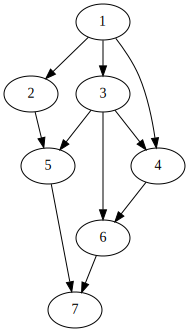

In [77]:
# Grafo del Ejercicio 3
dibujaGrafo(B)